<a href="https://colab.research.google.com/github/shariq101/Approaching-Convolution-Neural-Network/blob/main/Approaching_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras import models, layers, callbacks, datasets
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load CIFAR-10 directly from Keras' database.
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
X_train = X_train / 255
X_test = X_test / 255

print("Training data shape: ", X_train.shape)
print("Training labels shape: ", y_train.shape)
print("Testing data shape: ", X_test.shape)
print("Testing labels shape: ", y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Testing data shape:  (10000, 32, 32, 3)
Testing labels shape:  (10000, 1)


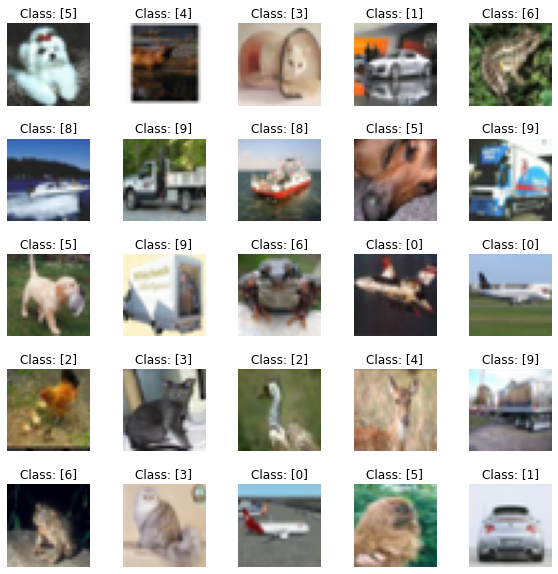

In [4]:
grid_height = 5
grid_width = 5

fig, axes = plt.subplots(grid_height, grid_width, figsize=(10, 10))
axes = axes.ravel()

for i in range(grid_height * grid_width):
    drafted_index = np.random.randint(0, X_train.shape[0])
    axes[i].imshow(X_train[drafted_index])
    axes[i].set_title("Class: " + str(y_train[drafted_index]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [5]:
# Sequential model with convolutional layers and many Dropout layers to
# mitigate overfitting:
# Conv -> Conv -> MaxPool -> Dropout ->
# Conv -> Conv -> MaxPool -> Dropout ->
# Flatten -> Dense -> Dropout ->
# Dense -> Dropout -> Dense
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(32, 32, 3)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D())
cnn_model.add(layers.Dropout(0.2))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))---should not increase more than input
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D())
cnn_model.add(layers.Dropout(0.2))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(800, activation='relu'))---always use power of 2
cnn_model.add(layers.Dropout(0.2))

cnn_model.add(layers.Dense(400, activation='relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(10, activation='softmax'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [6]:
# Monitor accuracy because loss can increase while accuracy improves.
early_stopping_callback = callbacks.EarlyStopping(monitor='val_accuracy',---over loss
                                                  patience=5,
                                                  restore_best_weights=True)
# LR reduction to help the gradient get to the minima.
learning_rate_callback = callbacks.ReduceLROnPlateau(patience=5)
batch_size = X_train.shape[0] // 200

cnn_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
                  metrics='accuracy')

# Since the dataset has only 10 classes, 100 epochs are enough for this
# model.
epochs_info = cnn_model.fit(X_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=100,
                            callbacks=[early_stopping_callback,
                                       learning_rate_callback],
                            validation_split=0.15)

Epoch 1/100
170/170 [==============================] - 182s 1s/step - loss: 2.0358 - accuracy: 0.2582 - val_loss: 2.5028 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/100
170/170 [==============================] - 151s 890ms/step - loss: 1.5941 - accuracy: 0.4324 - val_loss: 1.4513 - val_accuracy: 0.4817 - lr: 0.0010
Epoch 3/100
170/170 [==============================] - 148s 871ms/step - loss: 1.3726 - accuracy: 0.5132 - val_loss: 1.2947 - val_accuracy: 0.5369 - lr: 0.0010
Epoch 4/100
170/170 [==============================] - 149s 876ms/step - loss: 1.2100 - accuracy: 0.5755 - val_loss: 1.0781 - val_accuracy: 0.6275 - lr: 0.0010
Epoch 5/100
170/170 [==============================] - 150s 882ms/step - loss: 1.0843 - accuracy: 0.6215 - val_loss: 1.0210 - val_accuracy: 0.6444 - lr: 0.0010
Epoch 6/100
170/170 [==============================] - 149s 878ms/step - loss: 0.9763 - accuracy: 0.6590 - val_loss: 0.9514 - val_accuracy: 0.6688 - lr: 0.0010
Epoch 7/100
170/170 [======================

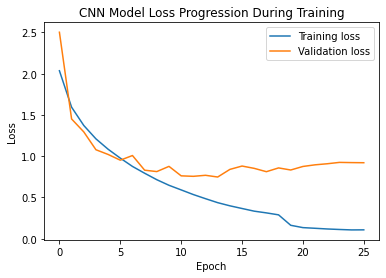

In [7]:
plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("CNN Model Loss Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

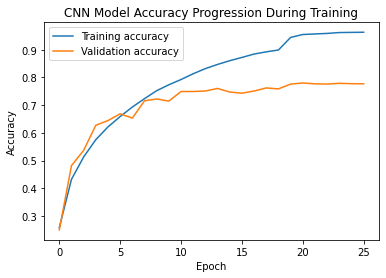

In [8]:
plt.plot(epochs_info.history['accuracy'])
plt.plot(epochs_info.history['val_accuracy'])
plt.title("CNN Model Accuracy Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

In [9]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 10s 32ms/step - loss: 0.9290 - accuracy: 0.7706


[0.9289588928222656, 0.7706000208854675]

In [10]:
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

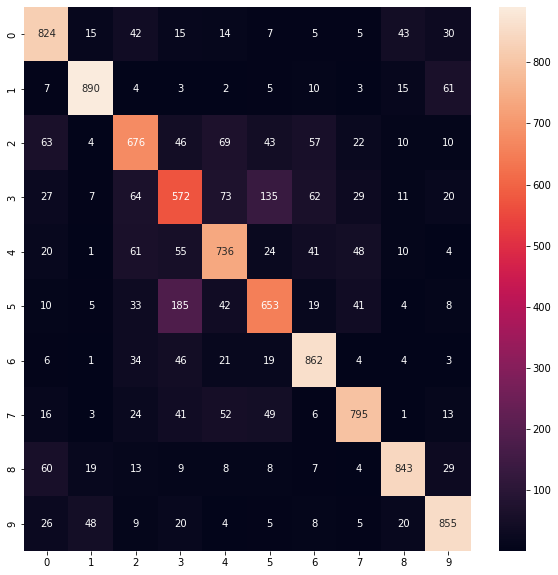

In [11]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [12]:
target_names = [
    "Class 0: Airplane",
    "Class 1: Automobile",
    "Class 2: Bird",
    "Class 3: Cat",
    "Class 4: Deer",
    "Class 5: Dog",
    "Class 6: Frog",
    "Class 7: Horse",
    "Class 8: Ship",
    "Class 9: Truck"
]

print(classification_report(y_test, y_pred_classes, target_names=target_names))

                     precision    recall  f1-score   support

  Class 0: Airplane       0.78      0.82      0.80      1000
Class 1: Automobile       0.90      0.89      0.89      1000
      Class 2: Bird       0.70      0.68      0.69      1000
       Class 3: Cat       0.58      0.57      0.57      1000
      Class 4: Deer       0.72      0.74      0.73      1000
       Class 5: Dog       0.69      0.65      0.67      1000
      Class 6: Frog       0.80      0.86      0.83      1000
     Class 7: Horse       0.83      0.80      0.81      1000
      Class 8: Ship       0.88      0.84      0.86      1000
     Class 9: Truck       0.83      0.85      0.84      1000

           accuracy                           0.77     10000
          macro avg       0.77      0.77      0.77     10000
       weighted avg       0.77      0.77      0.77     10000



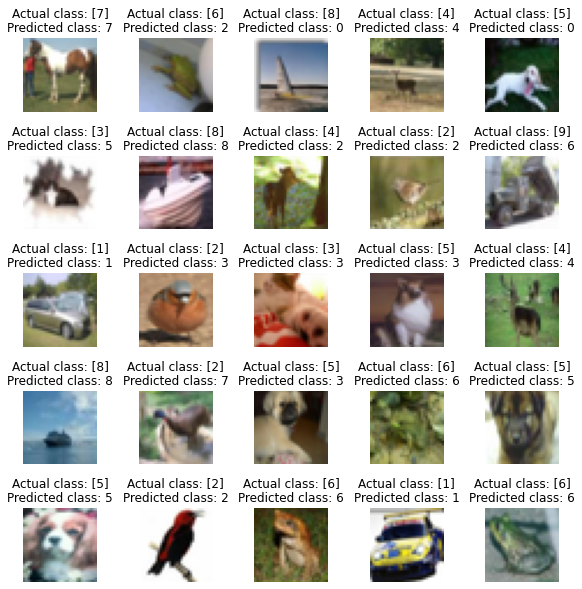

In [13]:
# 5x5 random grid of CIFAR images along with their predicted classes for
# each drafted image.
grid_height = 5
grid_width = 5

fig, axes = plt.subplots(grid_height, grid_width, figsize=(10, 10))
axes = axes.ravel()

for i in range(grid_height * grid_width):
    drafted_index = np.random.randint(0, X_test.shape[0])
    axes[i].imshow(X_test[drafted_index])
    axes[i].set_title(
        "Actual class: {}\nPredicted class: {}"
        .format(y_test[drafted_index], y_pred_classes[drafted_index])
    )
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.6)